# MISSION 4: Modelisations de type ANOVA et regression lineaire

Cette derniere  mission  consister  à modeliser  la table  obtenue de la mission 3 en appliquant  des  modelisations de type **ANOVA** et de  type  **regression lineaire** .
Ces applications  nous  permettront de repondre  à  des  problematiques   de repartition egalitaire dans  les differents  pays.

In [79]:
# Importation des  modules et librairies  pour  la data science 
import pandas as  pd
import  numpy as  np
import matplotlib.pyplot as  plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as st
from scipy.stats import ks_2samp
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import statsmodels.formula.api as smf
import statsmodels.api as sm
import math as ma
from statsmodels.formula.api import ols
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

#Une fois  les  modules  importés  nous allons  charger  les données  

# Chargeons  la table de  la  mission 3

In [13]:
df1 = pd.read_csv('df4v.csv')
df1v = df1.drop(columns  = ['Unnamed: 0','c_i_child'])
df1v

,pays,country,class_parent,m_J,logrevM,income,G_j,pj,p,p*500
0,Albania,ALB,1,2994.829902,8.004643,728.89795,0.2998,0.477171,0.096,48
1,Albania,ALB,1,2994.829902,8.004643,728.89795,0.2998,0.477171,0.096,48
2,Albania,ALB,1,2994.829902,8.004643,728.89795,0.2998,0.477171,0.096,48
3,Albania,ALB,1,2994.829902,8.004643,728.89795,0.2998,0.477171,0.096,48
4,Albania,ALB,1,2994.829902,8.004643,728.89795,0.2998,0.477171,0.096,48
...,...,...,...,...,...,...,...,...,...,...
3449995,Vietnam,VNM,100,1377.773966,7.228224,9522.46600,0.3815,0.527665,0.128,64
3449996,Vietnam,VNM,100,1377.773966,7.228224,9522.46600,0.3815,0.527665,0.128,64
3449997,Vietnam,VNM,100,1377.773966,7.228224,9522.46600,0.3815,0.527665,0.128,64
3449998,Vietnam,VNM,100,1377.773966,7.228224,9522.46600,0.3815,0.527665,0.128,64


In [14]:
#Creons  la variable de logarithme des revenus  moyens  m_j
df1v['incomelog'] = np.log(df1v['income'])
df1v.head()

,pays,country,class_parent,m_J,logrevM,income,G_j,pj,p,p*500,incomelog
0,Albania,ALB,1,2994.829902,8.004643,728.89795,0.2998,0.477171,0.096,48,6.591534
1,Albania,ALB,1,2994.829902,8.004643,728.89795,0.2998,0.477171,0.096,48,6.591534
2,Albania,ALB,1,2994.829902,8.004643,728.89795,0.2998,0.477171,0.096,48,6.591534
3,Albania,ALB,1,2994.829902,8.004643,728.89795,0.2998,0.477171,0.096,48,6.591534
4,Albania,ALB,1,2994.829902,8.004643,728.89795,0.2998,0.477171,0.096,48,6.591534


Nous avons toutes les variables nous  permettant de faire  l'analyse de la avriance  

# Realisation de  l'analyse de la variance  

# ANOVA sur  les variables initiales

Nous allons  realiser  les differentes anova en  mettant en comparaison  les variables  initiales et celles avec  les  logarithmes  . Ensuite  , nous comparons les differnts  resultats  

# Anova sur  le revenu  income

In [16]:
#Calculons  l'anova
anova_revenu = smf.ols('income~country', data=df1v).fit()
print(anova_revenu.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                 4.322e+04
Date:                Mon, 24 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:40:28   Log-Likelihood:            -3.5564e+07
No. Observations:             3450000   AIC:                         7.113e+07
Df Residuals:                 3449931   BIC:                         7.113e+07
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2994.8299     32.447     92.

La  p-value du test  est de 0 , cela est inferieur au seuil  de  5% . Et  nous avons  un R squared  de  0.46 .On rejette donc  l'hypothèse selon  laquelle    α1 =   α2 =   0
Le facteuur du  pays  a donc  une  incidence  sur  le revenu  des individus  
Pour obtenir le tableau de l'analyse de la variance, on utilise la commande anova_lm :

In [18]:
sm.stats.anova_lm(anova_revenu, typ=2)

,sum_sq,df,F,PR(>F)
country,1.547242e+14,68.0,43223.636696,0.0
Residual,1.816095e+14,3449931.0,NaN,NaN


La statistique utilisée en analyse de la variance suit sous H0 une loi de Fisher

# Etude sur  l'echantillon test  des missions 1 et 2

Pour  gagner entemps et  en data  ,  je decide de realiser  la  mission sur  l'echantillon test de depart de ce  projet.  Ainsi  j'appliquerai  toute la mission 4 sur cet echantillon
Commencer  par creer  la table de notre echantillon 

In [54]:
#Creation de la liste de pays , les individus comportant  notre echnatillon 
#Nous le ferons avec  la table de la mission 3  
#Creation de liste de pays  
Liste = ['Honduras','Slovenia','France','Mauritania','South Africa','China']

In [64]:
#Creons  une table avec  ces pays 
#Selections des pays  choisis
data = df1v[df1v['pays'].isin(Liste)]
data

,pays,country,class_parent,m_J,logrevM,income,G_j,pj,p,p*500,incomelog
600000,China,CHN,1,2522.758726,7.833108,16.719418,0.3940,0.4695,0.084,42,2.816571
600001,China,CHN,1,2522.758726,7.833108,16.719418,0.3940,0.4695,0.084,42,2.816571
600002,China,CHN,1,2522.758726,7.833108,16.719418,0.3940,0.4695,0.084,42,2.816571
600003,China,CHN,1,2522.758726,7.833108,16.719418,0.3940,0.4695,0.084,42,2.816571
600004,China,CHN,1,2522.758726,7.833108,16.719418,0.3940,0.4695,0.084,42,2.816571
...,...,...,...,...,...,...,...,...,...,...,...
3049995,South Africa,ZAF,100,5617.904880,8.633714,82408.550000,0.6301,0.6770,0.170,85,11.319444
3049996,South Africa,ZAF,100,5617.904880,8.633714,82408.550000,0.6301,0.6770,0.170,85,11.319444
3049997,South Africa,ZAF,100,5617.904880,8.633714,82408.550000,0.6301,0.6770,0.170,85,11.319444
3049998,South Africa,ZAF,100,5617.904880,8.633714,82408.550000,0.6301,0.6770,0.170,85,11.319444


Nous avons notre echantillon de test pret , nous appliquer  les differentes  modelisations  requises demandées  pour ce  projet.

# Anova sur  les revenus  

In [65]:
#Calculons  l'anova pour  les revenus 
anova_inc = smf.ols('income~pays', data = data).fit()
print(anova_inc.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                 3.249e+04
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:51:50   Log-Likelihood:            -3.1277e+06
No. Observations:              300000   AIC:                         6.255e+06
Df Residuals:                  299994   BIC:                         6.256e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2522.7587 

In [63]:
#Calculons  l'anova pour  les revenus avec logarithme
anova_inclog = smf.ols('incomelog~pays', data = data).fit()
print(anova_inclog.summary())

                            OLS Regression Results                            
Dep. Variable:              incomelog   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                 6.622e+04
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:48:40   Log-Likelihood:            -4.0451e+05
No. Observations:              300000   AIC:                         8.090e+05
Df Residuals:                  299994   BIC:                         8.091e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.3980 

Avec la variable en logarithme  ,  on obtient  une  plus grande  performance  avec un R carre superieur 

# Anova sur  les revenus  moyens m_J

In [73]:
#Calculons  l'anova sur  les revenus  moyens m_J
anova_mj = smf.ols('m_J~pays', data = data).fit()
print(anova_mj.summary())

                            OLS Regression Results                            
Dep. Variable:                    m_J   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.410e+28
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:19:01   Log-Likelihood:             5.2635e+06
No. Observations:              300000   AIC:                        -1.053e+07
Df Residuals:                  299994   BIC:                        -1.053e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2522.7587 

In [74]:
#Calculons  l'anova pour  les revenus moyens avec  logarithme
anova_incmoylog = smf.ols('logrevM~pays', data = data).fit()
print(anova_incmoylog.summary())

                            OLS Regression Results                            
Dep. Variable:                logrevM   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.522e+27
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:21:54   Log-Likelihood:             7.3673e+06
No. Observations:              300000   AIC:                        -1.473e+07
Df Residuals:                  299994   BIC:                        -1.473e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.8331 

On obtient encore  une  plus grande  performance  avec  le revenu moyen en  logarithme .

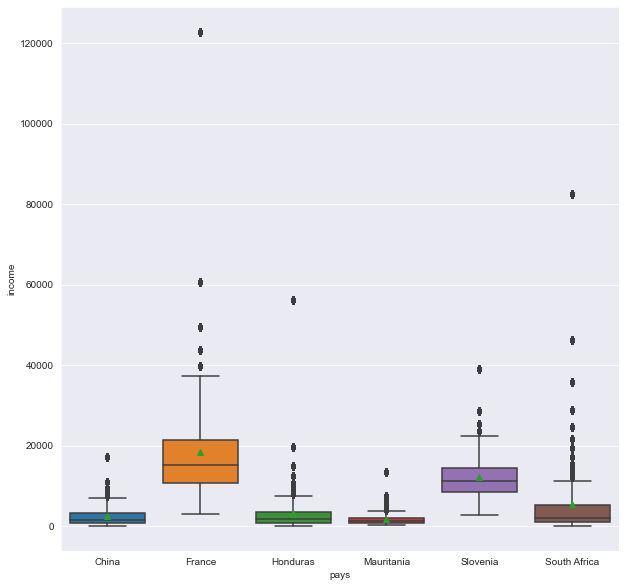

In [61]:
#Voyons graphiquement   les variances de cet echantillon
plt.figure(figsize=(10,10))
sns.boxplot(x='pays',y='income',showmeans = True,data = data)
plt.savefig('heteroscedasticité de  l echantillon test .jpg')

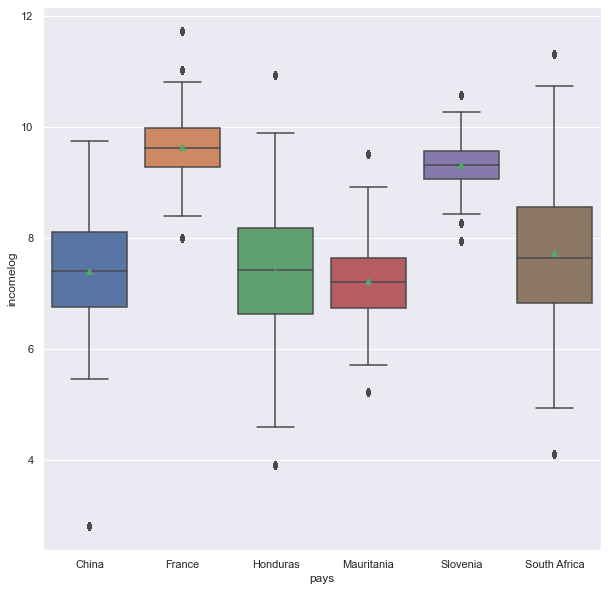

In [92]:
#Voyons graphiquement   les variances de cet echantillon avec la variable en  ogarithme
plt.figure(figsize=(10,10))
sns.boxplot(x='pays',y='incomelog',showmeans = True,data = data)
plt.savefig('heteroscedasticité de  l echantillon test de la variable  logarithme .jpg')

#Interpretation#
Daans notre echantillon  on voit  bien que  les pays  sont distinctement representés et  on  peut  voir  des ecarts importants entre les pays en nous basant  sur  les  interquantiles et  des  moyennes . Cependant  la Slovenie semble garder  un certain equilibre.
Appliqons  l'anova  pour  mesure  statistiquement  l'influence du  pays  dans  la repartition  egalitaire des revenus  des  populations

In [60]:
#Maintenant l'analyse de la variance  totale 
sm.stats.anova_lm(anova_inc, typ=2)

,sum_sq,df,F,PR(>F)
pays,1.081239e+13,5.0,32489.337955,0.0
Residual,1.996748e+13,299994.0,NaN,NaN


Le test  de fisher  indique  une  p-valeur significativement  pette  au seuil de  5 %.On rejette  donc  l'hypothèse que  les  moyennes sont egales et equivalentes  à  0. Cela indique  que  le  pays   a un  impact  sur  les revenus des  populations comme  pouvait  le  presager  l'illustration  graphique des  boites à moustaches.

Mais aussi  le  R carre de  0.35 est aussi important  si on  prend  en considerations d'autres facteurs potentiels  de  l'effort  , de  la chance  , des  politiques  diverses des pays .

# Test de  l'egalité des variances 

In [67]:
#Calculons  les variances  
data.groupby("pays")['income'].agg('var')

pays
China           6.633592e+06
France          2.059862e+08
Honduras        3.873323e+07
Mauritania      2.967371e+06
Slovenia        2.941356e+07
South Africa    1.156236e+08
Name: income, dtype: float64

Mais c’est le test de bartlett qui permet de tester si les variances sont significativement différentes ou non avec :

H0 : Les variances de chaque groupe sont égales si p-value > 5%
H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%

In [68]:
#Testons  l'egalité des variances  des deux clusters  
#Constituons nos echantillons en fonction des clusters designés
#dans notre echantillon  , nous avons  6 pays  mais  il suffit que deux des variables n'aient  pas la meme variance 
#Pour  proceder au tests de la variance
varChine =  data.loc[data['pays']== 'China']['income']
varFrance = data.loc[data['pays']== 'France']['income']

In [69]:
#On teste l'egalite des variances  sous  H0:σ2^1=σ2 si ^2 pvaluer >5 {H1:σ2^1≠σ2^2, si pvaleur <5%
st.bartlett(varChine,varFrance)

BartlettResult(statistic=105634.88494222007, pvalue=0.0)

In [ ]:
Les variances ne sont  pas egales mais nous allons  poursuivre en testant la normalité des residus 
On utilise le test de Shapiro-Wilk pour tester la normalité des résidus où :

H0 : Les résidus suivent une loi normale si p-value > 5%
H1 : Les résidus ne suivent pas une loi normale si p-value < 5%

In [80]:
from scipy.stats import shapiro
model = ols('income ~ pays', data = data).fit()
shapiro(model.resid)

ShapiroResult(statistic=0.5619639158248901, pvalue=0.0)

<AxesSubplot:>

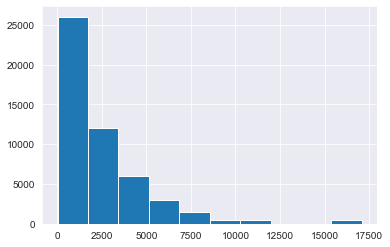

In [81]:
#Representons graphiquement  si  les distributions ssuivent  une  logique de  loi  normale  
varChine.hist()

<AxesSubplot:>

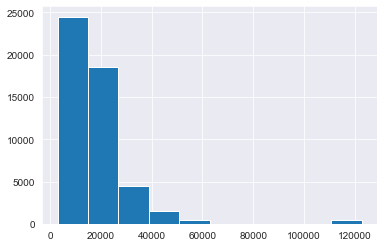

In [82]:
#Pour la France
varFrance.hist()

Cs deux graphes  n'ont  pas  l'allure  ou  forme  de cloche  de  la  loi gaussienne

# Conclusion  partielle 

Les versions  logarithmiques semblent etre  les  plus  performantes au regard  du   R  carré qui est plus  grand  autour de 1  pour  les deux variables de revenus  et  de revenus  moyens  . 
Aussi  , on  peut conclure que  le facteur  pays a bien  un effet significatif sur  les revenus  des individus  .

# Regressions  lineaires  

In [84]:
reg_multi = smf.ols('income~m_J+G_j', data = data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                 8.122e+04
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:57:56   Log-Likelihood:            -3.1277e+06
No. Observations:              300000   AIC:                         6.255e+06
Df Residuals:                  299997   BIC:                         6.255e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.148e-09     66.306   3.24e-11      1.0

Cette regression multiple  nous envoie  un R carré de 0.35 tandis que la p-valeur est de 0 donc  inferieur au seuil de test de 0?05.Cela peut dire qu'il n'existe pas de relation lineaire entre  le revenu  des  individus et le pays  dans  lesquels  ils vivent 
La variable de  l'indice de gini vaut  1 comme p valeur donc superieur au seuil du test. Du coup elle est  non significative  pour  determiner  le revenu  des individus  des pays.Bien evidemment le revenu  est significatif car tributaire de  l'ensemble des revenus du  pays .

La deomposition totale de la variance  indique  O.35  ce qui est notable de savoir que  le pays de naissance  ou residence  peut  influer  sur   les revenus  de individus.
Les autres elemnts comme  l'effort  ou la chance ne sont  pas  à negliger aussi . Car dans  un pays  tendant  vers   une repartition  egalitaire  tout est  possible et les  moyens sont  mis  pour accroitre  la chance  d'avoir  ou de disposer de revenus adequats.



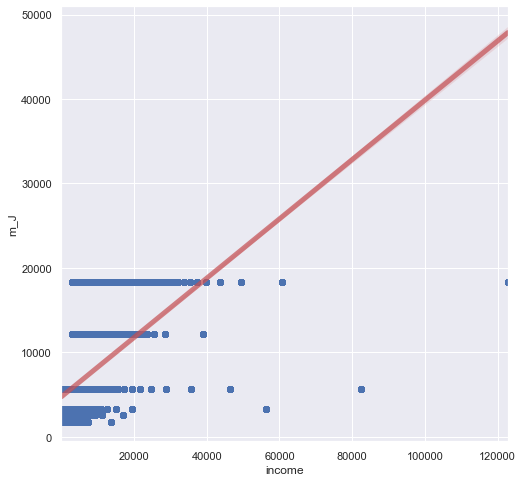

In [87]:
#Affichons  un diagramme de dispersion des ces deux variables  
plt.figure(figsize=(8,8))
sns.regplot(x= data["income"], y= data["m_J"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

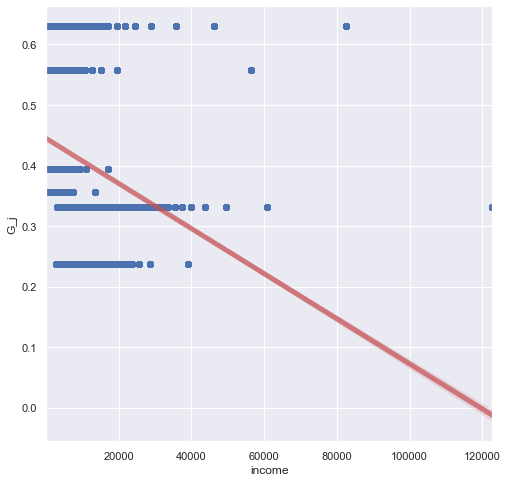

In [88]:
#Affichons  un diagramme de dispersion des ces deux variables  
plt.figure(figsize=(8,8))
sns.regplot(x= data["income"], y= data["G_j"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

# L'Importance de  la classe des parents

In [90]:
reg_multi_classeP = smf.ols('income~m_J+G_j+class_parent', data = data).fit()
print(reg_multi_classeP.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                 6.669e+04
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:41:06   Log-Likelihood:            -3.1160e+06
No. Observations:              300000   AIC:                         6.232e+06
Df Residuals:                  299996   BIC:                         6.232e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3914.3698     68.511    -57.135   

La classe parent ameliore  le  modele  à hauteur de  5% .